## Portfolio Management - Monte Carlo Simulations

Portfolio management involves creating and managing a diverse set of assets, such as stocks, bonds, and cash, to align with an investor's long-term financial objectives and risk tolerance. This process involves
* Investment Selection
* Asset Allocation
* Risk Management
* Performance Monitoring

There are different stratergies investors follow to find the optimal allocation of assets that maximizes the return while minimizing the risk. This is done by considering investor's financial goals of return and risk. By **diversifying** the assets across various investment avenues helps achieve an optimal balance of risk and reward.

There are several mathematical models that are used in this optimization problem. In this notebook we use the following model,

**Monte Carlo Simulations**

Monte Carlo simulation is a stochastic technique used to model and analyze the potential outcomes of a portfolio by simulating a wide range of possible allocations. Instead of solving an optimization problem directly, it generates random portfolio weights and evaluates their performance in terms of return, volatility, and risk-adjusted return (e.g., the Sharpe ratio).






In [ ]:
!pip install pypfopt

ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [ ]:
#pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime, timedelta
#from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting


In [3]:
# input = past n years data
def fetch_past_data(tickers, n):
  # to get previous n years of data
  end_date = datetime.today()
  start_date = end_date - timedelta(days = n*365)
  data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
  return data

In [4]:
# Define tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2018-01-01'
#end_date = '2023-01-01'

# Download data
data = fetch_past_data(tickers, 5)
returns = data.pct_change().dropna()


[*********************100%***********************]  5 of 5 completed


In [5]:
# Calculate annualized expected returns and covariance matrix
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252


In [6]:
N = 100000 # number of iterations

In [7]:
Num_of_asset_class = len(tickers)
weights_list = []
portfolio_return = []
portfolio_volatility = []
sharpe_ratio = []


for i in range(N):
    random_weights = np.random.random(Num_of_asset_class)
    weights = random_weights / np.sum(random_weights)
    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_sharpe = port_return / port_volatility

    # Append results to the respective lists
    portfolio_return.append(port_return)
    portfolio_volatility.append(port_volatility)
    sharpe_ratio.append(port_sharpe)
    weights_list.append(weights.tolist())



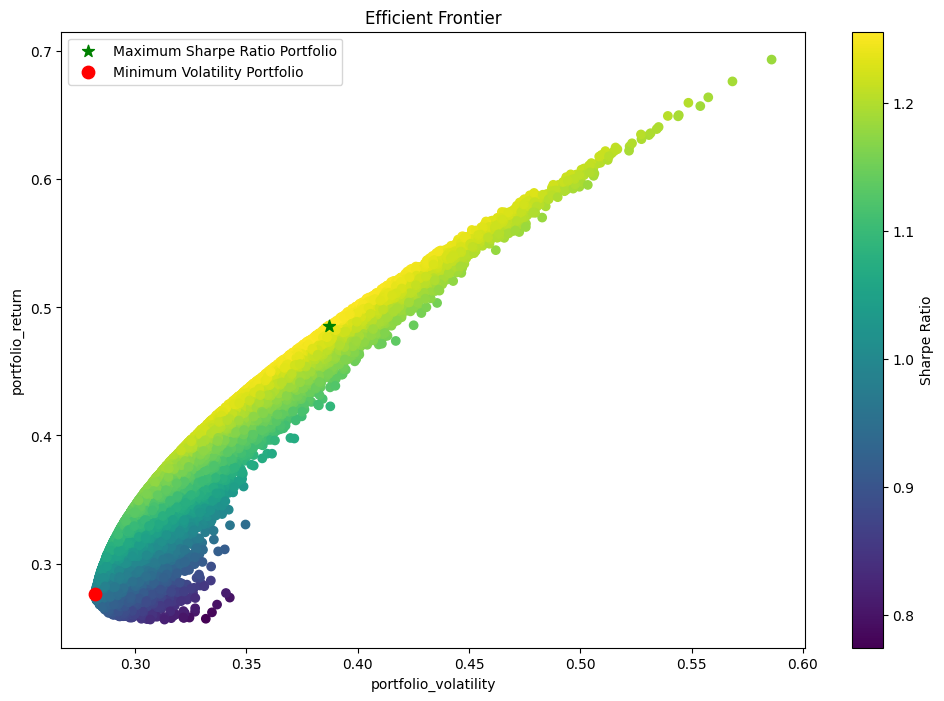

In [14]:
#plot efficient frontier

plt.figure(figsize=(12, 8))

plt.scatter(portfolio_volatility, portfolio_return, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')

# Add labels and title (optional)
plt.xlabel('portfolio_volatility')
plt.ylabel('portfolio_return')
plt.title('Efficient Frontier')

max_sharpe_idx = np.argmax(sharpe_ratio)
max_sharpe_return = portfolio_return[max_sharpe_idx]
max_sharpe_volatility = portfolio_volatility[max_sharpe_idx]
max_Sharpe = sharpe_ratio[max_sharpe_idx]

min_vol_idx = np.argmin(portfolio_volatility)
min_vol_return = portfolio_return[min_vol_idx]
min_vol_sharpe = sharpe_ratio[min_vol_idx]
min_vol = portfolio_volatility[min_vol_idx]

# Display the plot with max sharpe ratio
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='green', marker='*', label='Maximum Sharpe Ratio Portfolio', s=80)

# Display the plot with min volatility
plt.scatter(min_vol, min_vol_return, c='red', marker='o', label='Minimum Volatility Portfolio', s=80)
plt.legend()
plt.show()



In [15]:
print(f"max_sharpe_return: {max_sharpe_return:.2f}")
print(f"max_sharpe_volatility: {max_sharpe_volatility:.2f}")
print(f"max_Sharpe Ratio: {max_Sharpe:.2f}")

max_sharpe_return: 0.49
max_sharpe_volatility: 0.39
max_Sharpe Ratio: 1.26


In [17]:
print(f"min_vol_return: {min_vol_return:.2f}")
print(f"min_vol: {min_vol:.2f}")
print(f"min_vol_sharpe: {min_vol_sharpe:.2f}")

min_vol_return: 0.28
min_vol: 0.28
min_vol_sharpe: 0.98


* This means that if you invested in this portfolio with the given weights(weights that gives max_sharp_ratio), and assuming the returns and volatility follow a similar pattern to the historical data, you would expect to earn 47.8% in one year.
* The annualized return reflects the total return over a year, taking into account all assets in the portfolio and their weights, compounded over time.

* The maximum Sharpe ratio portfolio is considered the one that provides the highest return relative to its risk (volatility). It provides the highest return per unit of risk.

In [10]:
max_sharpe_weights = weights_list[max_sharpe_idx]
max_sharpe_weights

[0.37828331100622653,
 0.0008514997843439956,
 0.16354315025494473,
 0.05502678827558592,
 0.40229525067889876]

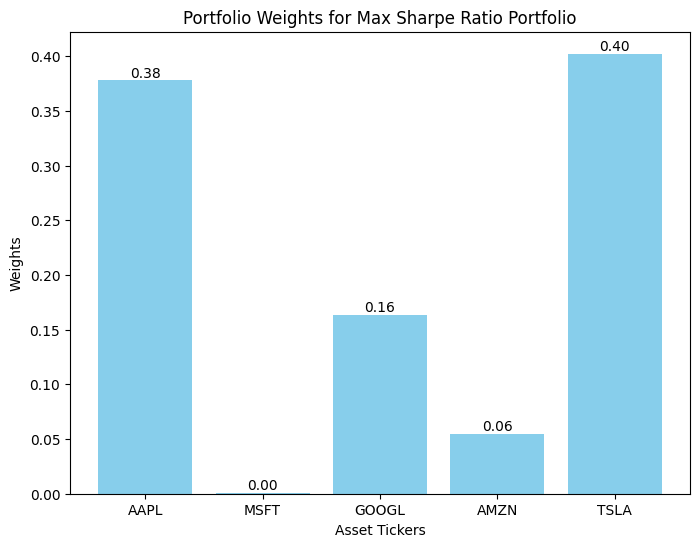

In [11]:
# Plot bar graph for the weights corresponding to the max Sharpe ratio
plt.figure(figsize=(8, 6))
bars = plt.bar(tickers, max_sharpe_weights, color='skyblue')

for bar, weight in zip(bars, max_sharpe_weights):
  plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height(),
                 f'{weight:.2f}',  # Format weights to 2 decimal places
                 ha='center',
                 va='bottom',
                 fontsize=10)
# Add labels and title
plt.xlabel('Asset Tickers')
plt.ylabel('Weights')
plt.title('Portfolio Weights for Max Sharpe Ratio Portfolio')

# Show the bar plot
plt.show()

In [18]:
min_vol_weights = weights_list[min_vol_idx]
min_vol_weights

[0.3336151097960345,
 0.10689055087354547,
 0.21845134051759796,
 0.34062839707865583,
 0.00041460173416625373]

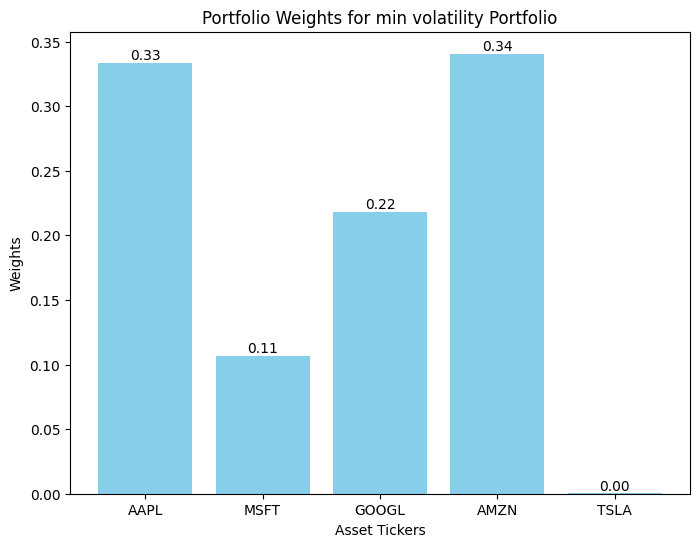

In [19]:
# Plot bar graph for the weights corresponding to the min Volatility
plt.figure(figsize=(8, 6))
bars = plt.bar(tickers, min_vol_weights, color='skyblue')

for bar, weight in zip(bars, min_vol_weights):
  plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height(),
                 f'{weight:.2f}',  # Format weights to 2 decimal places
                 ha='center',
                 va='bottom',
                 fontsize=10)
# Add labels and title
plt.xlabel('Asset Tickers')
plt.ylabel('Weights')
plt.title('Portfolio Weights for min volatility Portfolio')

# Show the bar plot
plt.show()